In [ ]:
import pandas as pd

df_basic = pd.read_csv('DATASET NUMERIK   - Sheet1.csv')
df_basic.head()

,PROVINSI,TAHUN,IKP,Luas Panen Tanaman Padi (ha) (Ha),Produktivitas Tanaman Padi (ku/ha) (Ku/ha),Rekap Produksi Padi (ton) (Ton),Persentase Penduduk Miskin - Maret,Gini Ratio
0,ACEH,2020,"70,92","317869,4","55,28",1757313,"14,99","0,323"
1,SUMATERA UTARA,2020,"71,84","388591,2","52,51",2040500,"8,75","0,316"
2,SUMATERA BARAT,2020,"78,64","295664,5","46,92",1387269,"6,28","0,305"
3,RIAU,2020,"64,12","64733,13","37,64",243685,"6,82","0,329"
4,JAMBI,2020,70,"84772,93","45,58","386413,5","7,58","0,32"


In [ ]:
df_basic = df_basic.rename(columns={
    'Luas Panen Tanaman Padi (ha) (Ha)': 'Luas_Panen',
    'Produktivitas Tanaman Padi (ku/ha) (Ku/ha)': 'Produktivitas',
    'Rekap Produksi Padi (ton) (Ton)': 'Produksi',
    'Persentase Penduduk Miskin - Maret': 'Persentase_Miskin',
    'Gini Ratio': 'Gini'
})

num_cols = ['IKP', 'Luas_Panen', 'Produktivitas', 'Produksi', 'Persentase_Miskin', 'Gini']

for col in num_cols:
    df_basic[col] = df_basic[col].astype(str).str.replace(',', '.').astype(float)

df_basic[num_cols] = df_basic[num_cols].fillna(df_basic[num_cols].median())


In [ ]:
# Group by 'PROVINSI' and calculate the mean of numerical columns
df_basic = df_basic.groupby('PROVINSI')[num_cols].mean().reset_index()

In [ ]:
df = df_basic.copy()

In [ ]:
df.head()

,PROVINSI,IKP,Luas_Panen,Produktivitas,Produksi,Persentase_Miskin,Gini
0,ACEH,71.922,288432.356,55.238,1593121.920,14.410,0.3096
1,BALI,85.886,104164.120,60.240,628147.002,4.186,0.3666
2,BANTEN,75.920,318222.572,52.066,1656821.200,6.122,0.3624
3,BENGKULU,70.850,58129.216,48.410,281018.858,14.286,0.3300
4,DI YOGYAKARTA,82.060,106330.258,49.398,525714.406,11.572,0.4396


In [ ]:
df['Luas_Panen_Pct'] = (df['Luas_Panen'] / df['Luas_Panen'].sum()) * 100
df['Produksi_Pct'] = (df['Produksi'] / df['Produksi'].sum()) * 100

display(df[['PROVINSI', 'Luas_Panen', 'Luas_Panen_Pct', 'Produksi', 'Produksi_Pct']].head())

,PROVINSI,Luas_Panen,Luas_Panen_Pct,Produksi,Produksi_Pct
0,ACEH,288432.356,2.790285,1593121.920,2.944588
1,BALI,104164.120,1.007680,628147.002,1.161012
2,BANTEN,318222.572,3.078474,1656821.200,3.062324
3,BENGKULU,58129.216,0.562340,281018.858,0.519411
4,DI YOGYAKARTA,106330.258,1.028635,525714.406,0.971685


In [ ]:
df = df.drop(['Luas_Panen', 'Produksi'], axis=1)
display(df.head())

,PROVINSI,IKP,Produktivitas,Persentase_Miskin,Gini,Luas_Panen_Pct,Produksi_Pct
0,ACEH,71.922,55.238,14.410,0.3096,2.790285,2.944588
1,BALI,85.886,60.240,4.186,0.3666,1.007680,1.161012
2,BANTEN,75.920,52.066,6.122,0.3624,3.078474,3.062324
3,BENGKULU,70.850,48.410,14.286,0.3300,0.562340,0.519411
4,DI YOGYAKARTA,82.060,49.398,11.572,0.4396,1.028635,0.971685


In [ ]:
import numpy as np

df['Persentase_Miskin'] = np.log1p(df['Persentase_Miskin'])
df['Gini'] = np.log1p(df['Gini'])

display(df.head())

,PROVINSI,IKP,Produktivitas,Persentase_Miskin,Gini,Luas_Panen_Pct,Produksi_Pct
0,ACEH,71.922,55.238,2.735017,0.269722,2.790285,2.944588
1,BALI,85.886,60.240,1.645963,0.312326,1.007680,1.161012
2,BANTEN,75.920,52.066,1.963189,0.309248,3.078474,3.062324
3,BENGKULU,70.850,48.410,2.726937,0.285179,0.562340,0.519411
4,DI YOGYAKARTA,82.060,49.398,2.531472,0.364365,1.028635,0.971685


In [ ]:
# Calculate 'Kerentanan'
df['Kerentanan'] = df['Persentase_Miskin'] * df['Gini']

# Calculate 'Intensitas', handling division by zero
df['Intensitas'] = df['Produksi_Pct'] / df['Luas_Panen_Pct']
df['Intensitas'] = df['Intensitas'].replace([np.inf, -np.inf], np.nan) # Replace inf with NaN
df['Intensitas'] = df['Intensitas'].fillna(0) # Fill NaN with 0 (or another appropriate value)


# Calculate 'Kesejahteraan_Agri'
df['Kesejahteraan_Agri'] = df['Produktivitas'] / df['Persentase_Miskin']
df['Kesejahteraan_Agri'] = df['Kesejahteraan_Agri'].replace([np.inf, -np.inf], np.nan) # Replace inf with NaN
df['Kesejahteraan_Agri'] = df['Kesejahteraan_Agri'].fillna(df['Kesejahteraan_Agri'].median()) # Fill NaN with median (or another appropriate value)


display(df[['PROVINSI', 'Kerentanan', 'Intensitas', 'Kesejahteraan_Agri']].head())

,PROVINSI,Kerentanan,Intensitas,Kesejahteraan_Agri
0,ACEH,0.737693,1.055300,20.196586
1,BALI,0.514077,1.152164,36.598643
2,BANTEN,0.607112,0.994754,26.521140
3,BENGKULU,0.777665,0.923660,17.752516
4,DI YOGYAKARTA,0.922381,0.944635,19.513547


In [ ]:
# Automatically identify numerical columns excluding 'TAHUN'
num_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'TAHUN' in num_cols:
    num_cols.remove('TAHUN')

print("Numerical columns identified:")
print(num_cols)

Numerical columns identified:
['IKP', 'Produktivitas', 'Persentase_Miskin', 'Gini', 'Luas_Panen_Pct', 'Produksi_Pct', 'Kerentanan', 'Intensitas', 'Kesejahteraan_Agri']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])
df_scaled.head()

,PROVINSI,IKP,Produktivitas,Persentase_Miskin,Gini,Luas_Panen_Pct,Produksi_Pct,Kerentanan,Intensitas,Kesejahteraan_Agri
0,ACEH,-0.124393,1.199539,0.983109,-0.826777,-0.033770,0.000705,0.302954,1.202203,-0.005579
1,BALI,1.317756,1.821167,-1.580039,0.527226,-0.432723,-0.368028,-1.083447,1.829368,3.348676
2,BANTEN,0.288505,0.805337,-0.833431,0.429402,0.030728,0.025046,-0.506639,0.810181,1.287806
3,BENGKULU,-0.235105,0.350984,0.964094,-0.335532,-0.532392,-0.500672,0.550774,0.349865,-0.505397
4,DI YOGYAKARTA,0.922621,0.473769,0.504056,2.181090,-0.428033,-0.407169,1.447995,0.485674,-0.145262


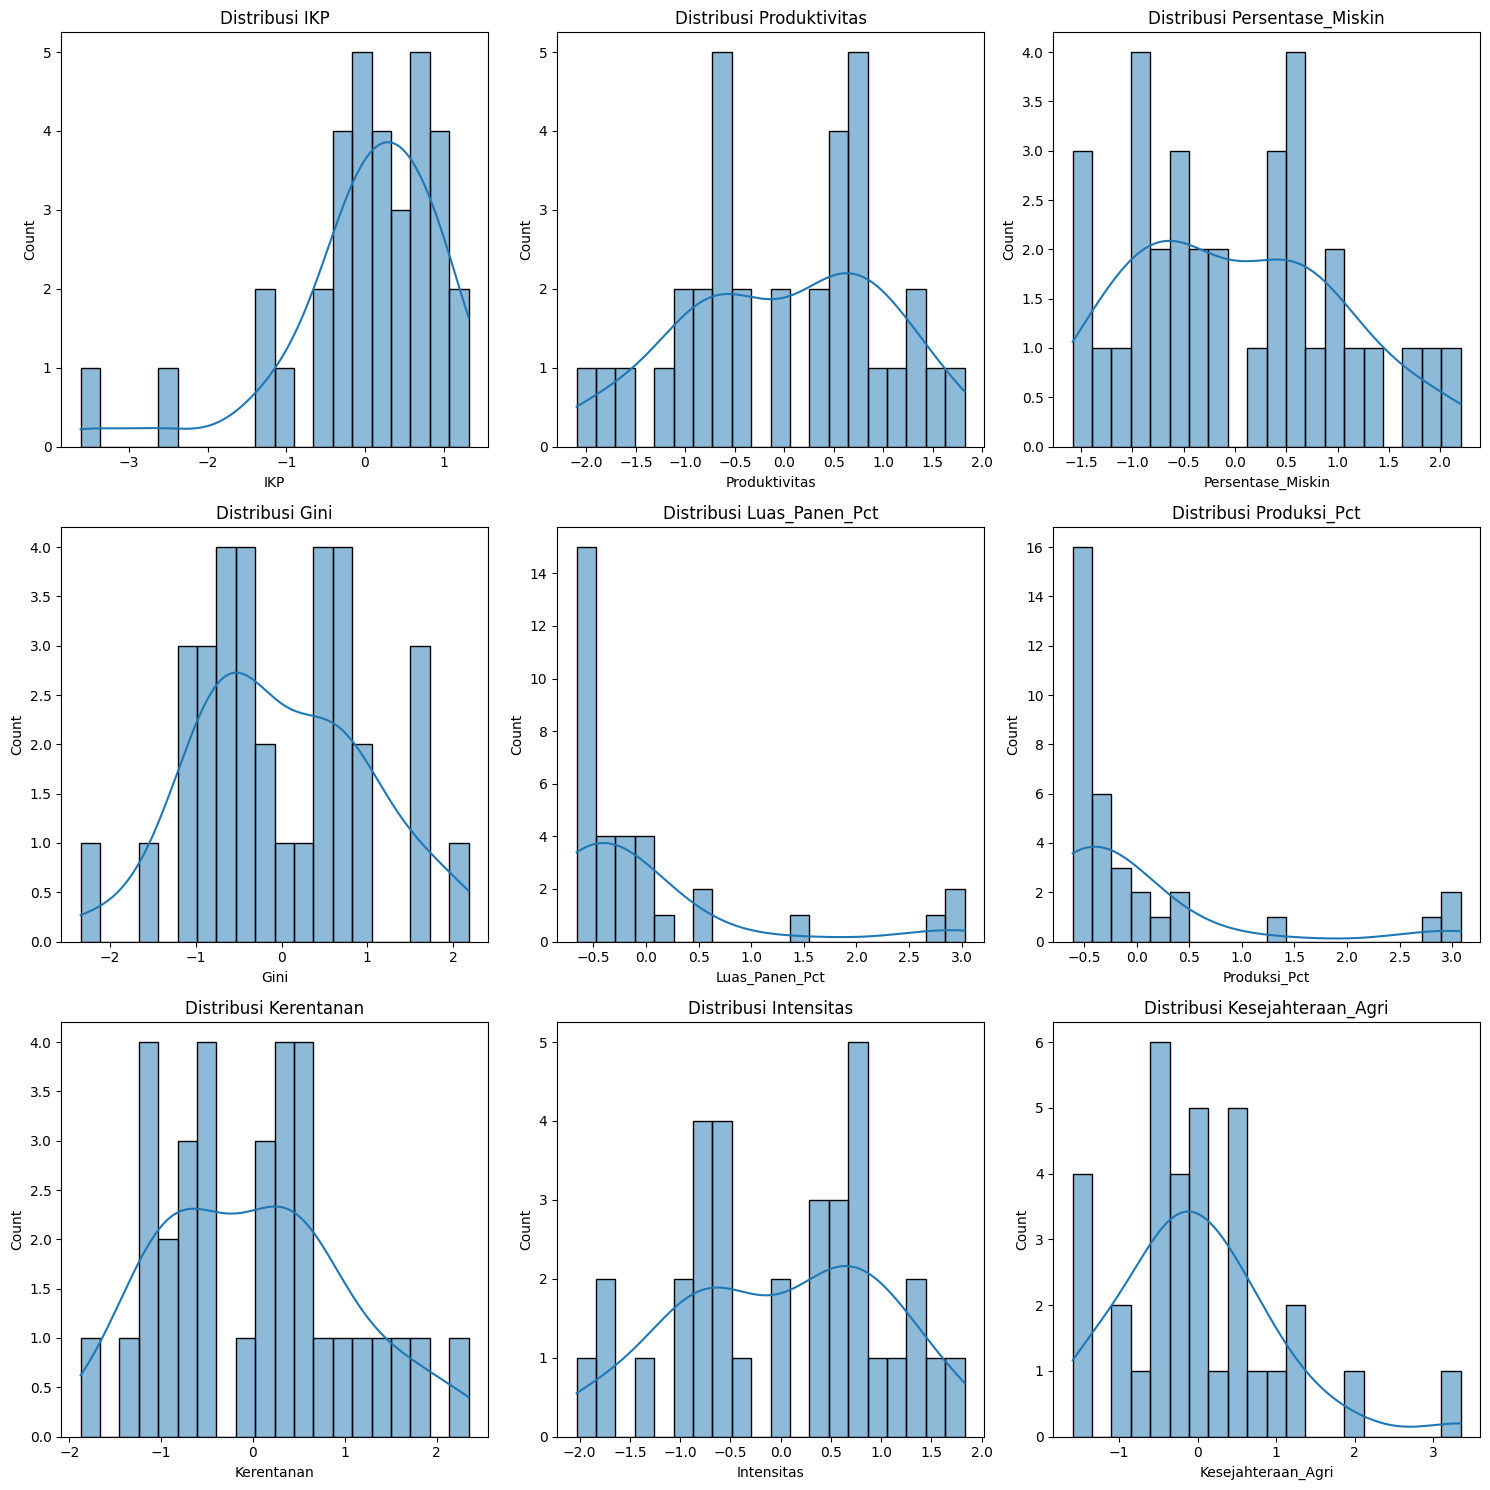

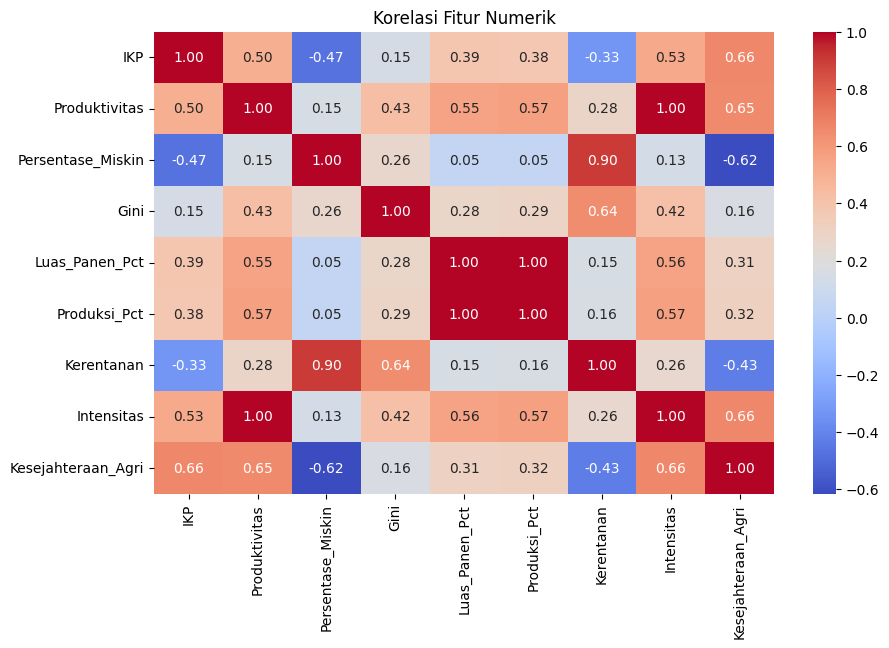

<Figure size 1200x800 with 0 Axes>

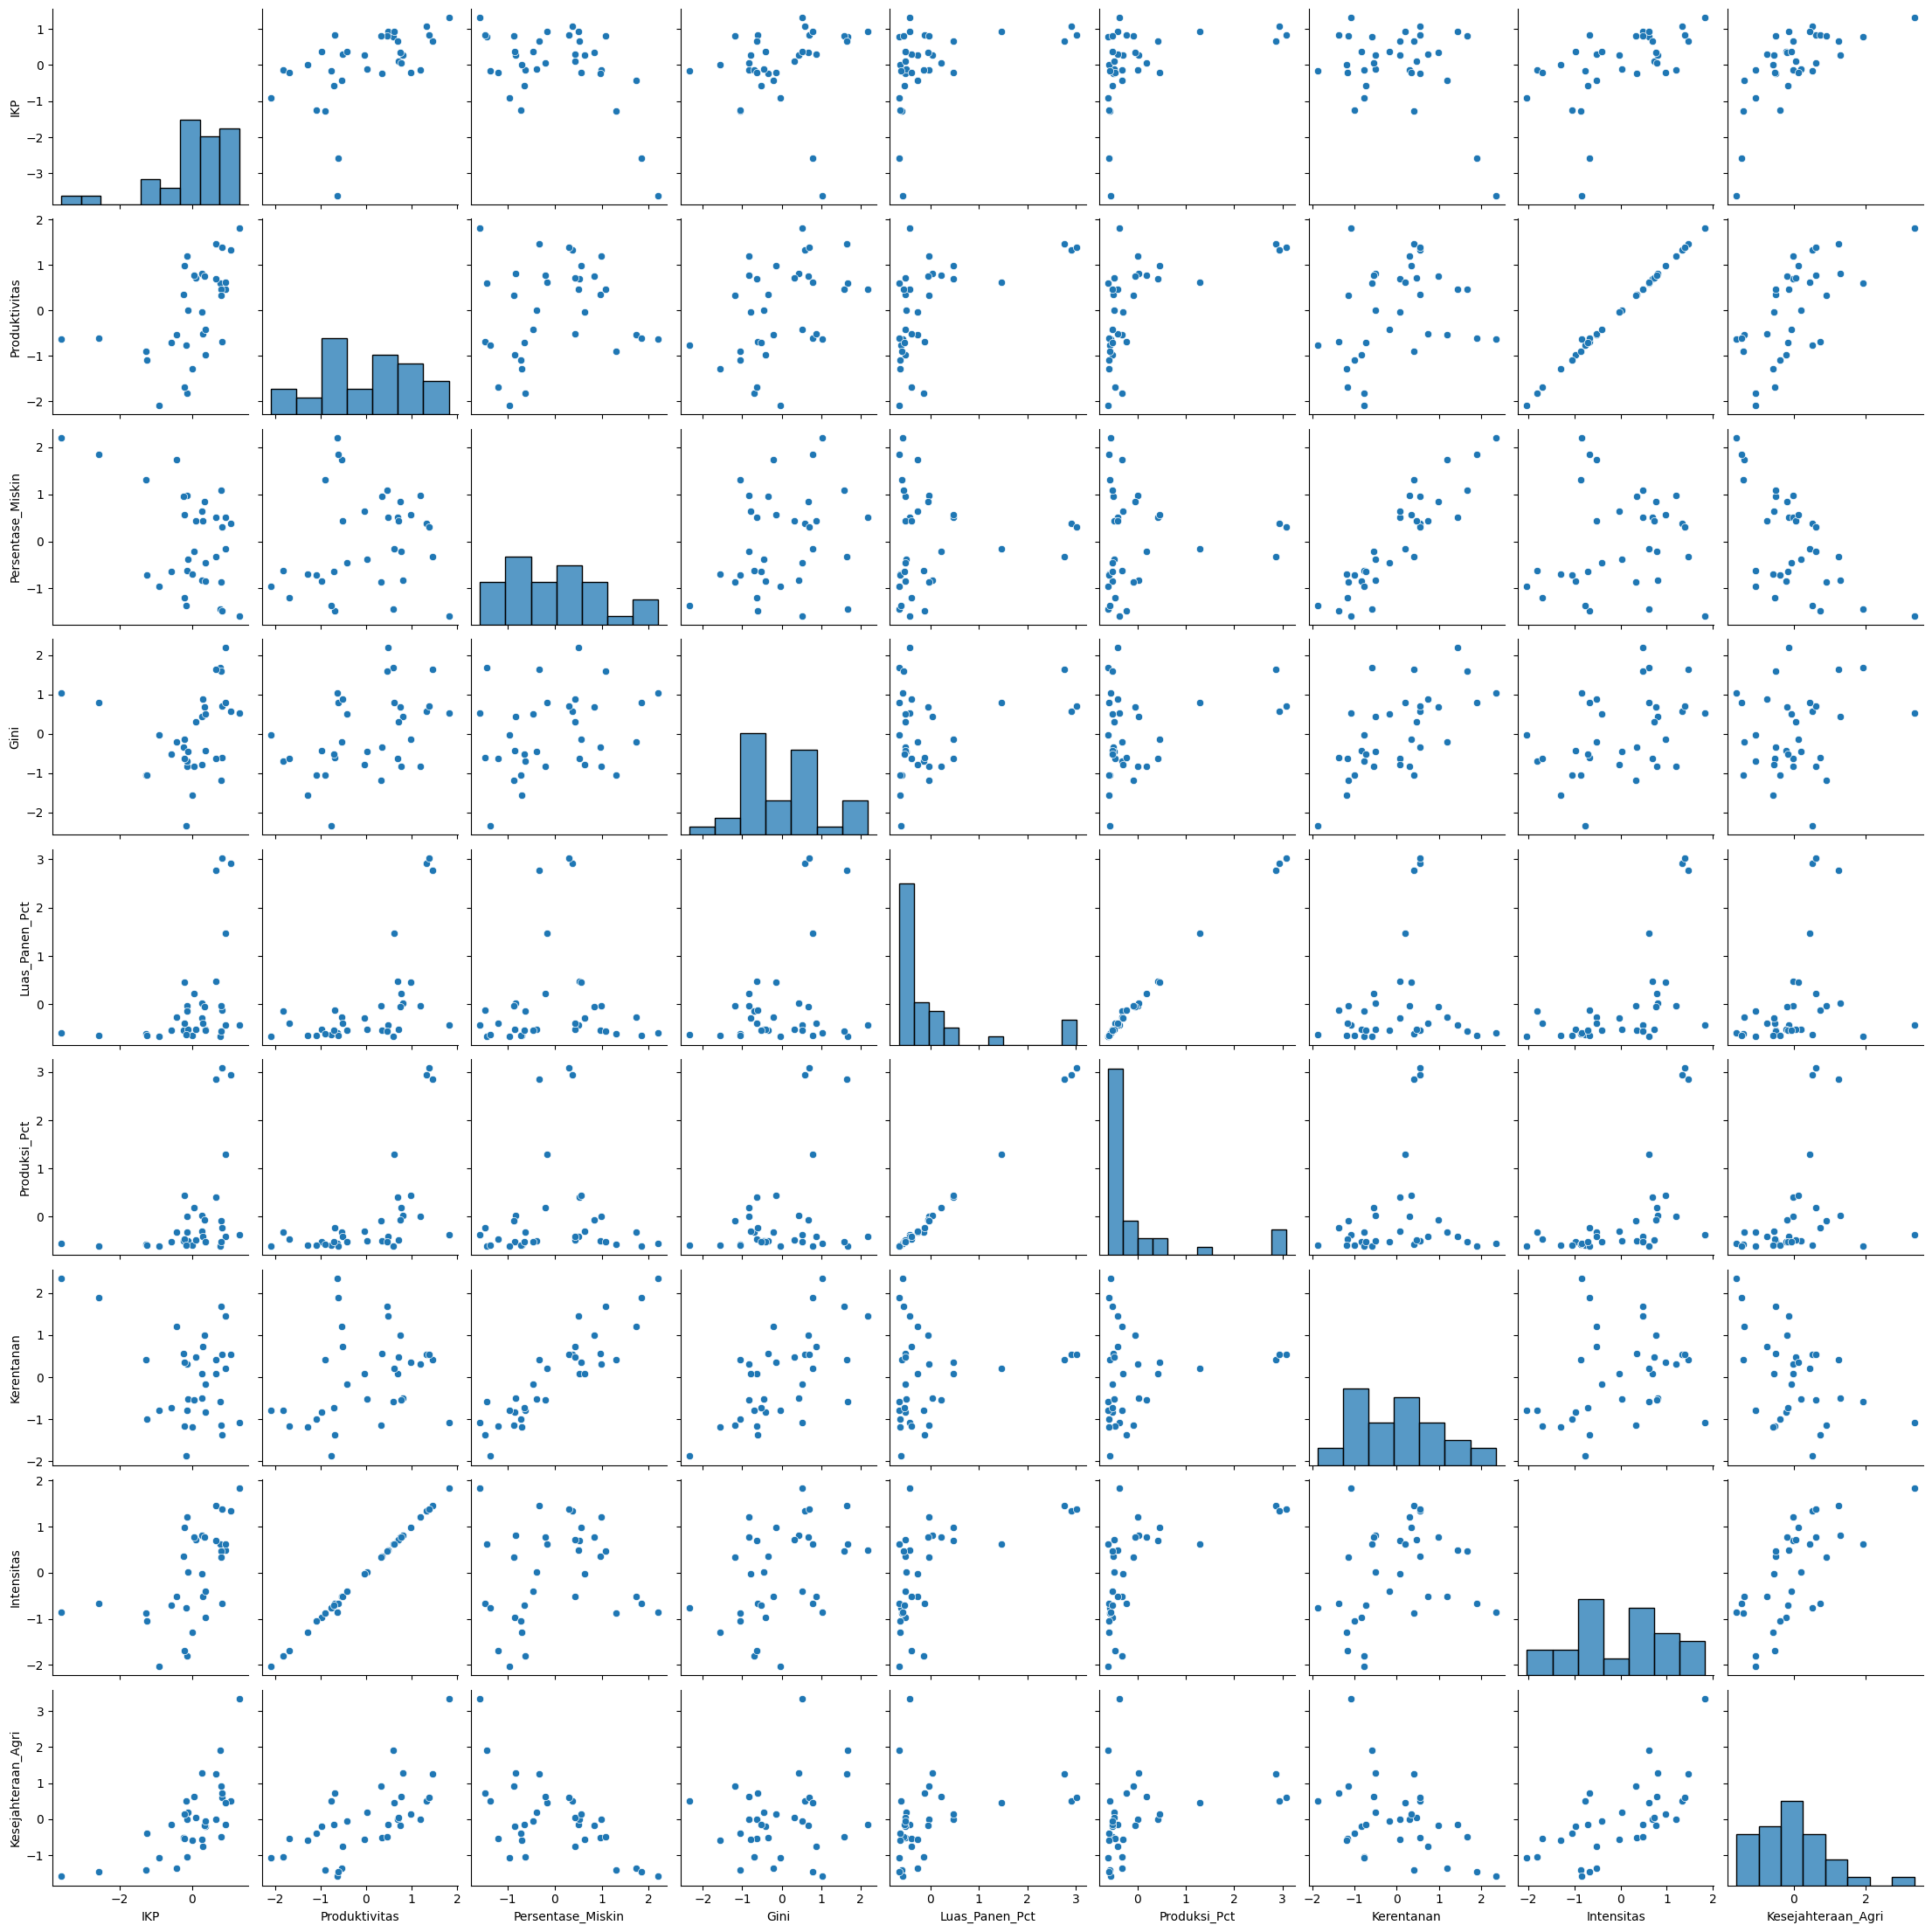

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15)) # Adjust figure size for more plots
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1) # Changed grid to 3x3
    sns.histplot(df_scaled[col], kde=True, bins=20)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
corr = df_scaled[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Fitur Numerik")
plt.show()

plt.figure(figsize=(12,8))
sns.pairplot(df_scaled[num_cols])
plt.show()

Variance explained by components: [0.45623017 0.76139491 0.88286754 0.95543633]


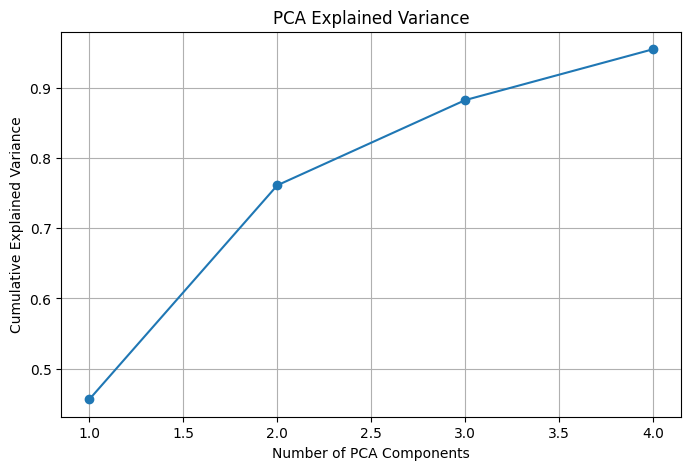

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca_result = pca.fit_transform(df_scaled[num_cols])
explained_variance = pca.explained_variance_ratio_.cumsum()
print("Variance explained by components:", explained_variance)

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()

df_pca = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])


Number of clusters: 2, Silhouette Score: 0.2476
Number of clusters: 3, Silhouette Score: 0.2233
Number of clusters: 4, Silhouette Score: 0.3583
Number of clusters: 5, Silhouette Score: 0.3898
Number of clusters: 6, Silhouette Score: 0.2966
Number of clusters: 7, Silhouette Score: 0.2705
Number of clusters: 8, Silhouette Score: 0.2532
Number of clusters: 9, Silhouette Score: 0.2700
Number of clusters: 10, Silhouette Score: 0.3041


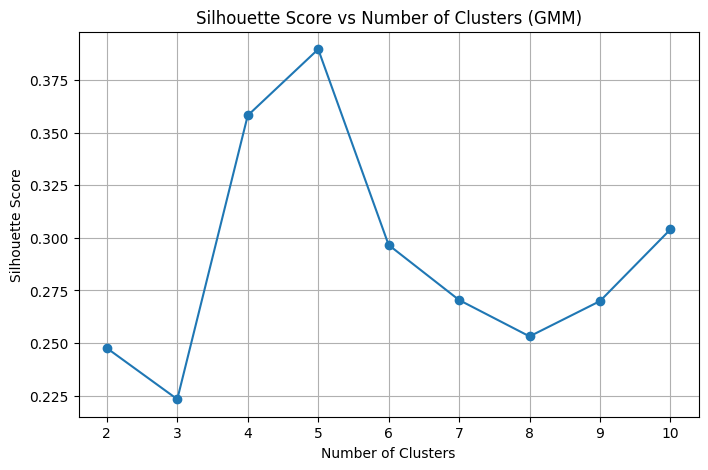

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
silhouette_scores = []

for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=42)
    cluster_labels = gmm.fit_predict(df_pca)
    score = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(score)
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {score:.4f}')

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters (GMM)")
plt.grid(True)
plt.show()


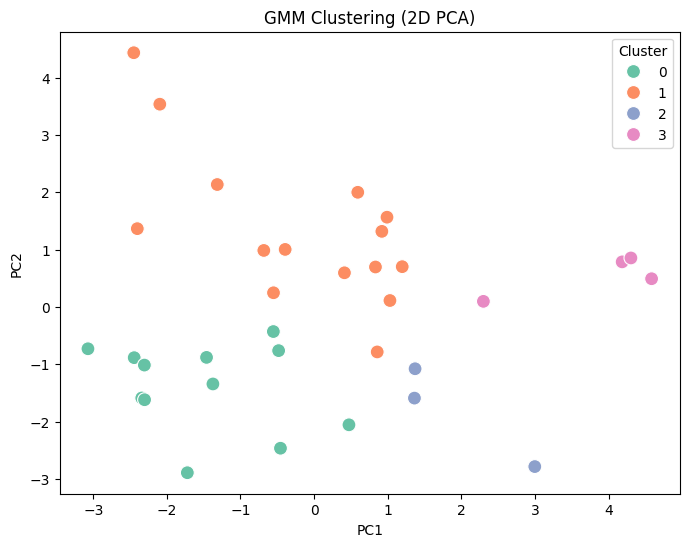

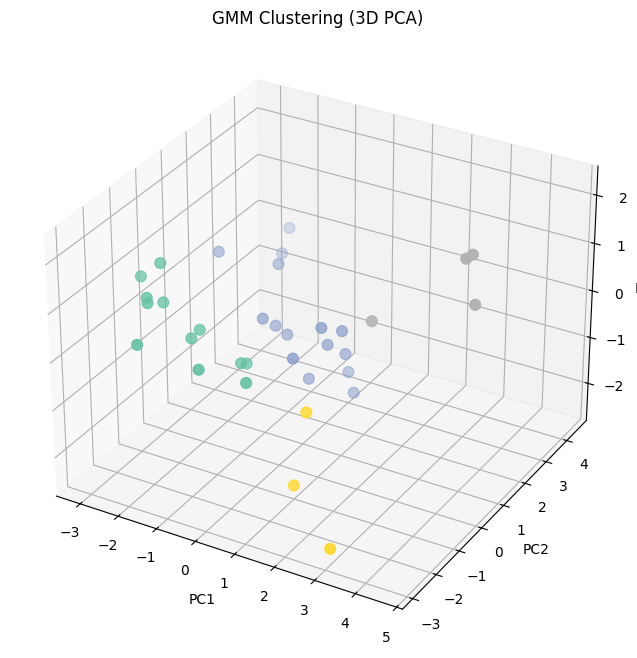

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

optimal_clusters = 4  # ganti sesuai hasil silhouette maksimal
gmm = GaussianMixture(n_components=optimal_clusters, covariance_type='full', random_state=42)
cluster_labels = gmm.fit_predict(df_pca)
df_pca['Cluster'] = cluster_labels
df['Cluster'] = cluster_labels
df_basic['Cluster'] = cluster_labels

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=df_pca, s=100)
plt.title("GMM Clustering (2D PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()

if df_pca.shape[1] >= 3:
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=cluster_labels, cmap='Set2', s=60)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('GMM Clustering (3D PCA)')
    plt.show()


               IKP  Produktivitas  Persentase_Miskin      Gini  \
Cluster                                                          
0        72.367167      38.080167           1.956287  0.272162   
1        69.932133      47.291333           2.709721  0.301295   
2        80.812667      54.252000           1.771542  0.323372   
3        81.618500      55.207000           2.338116  0.324889   

         Luas_Panen_Pct  Produksi_Pct  Kerentanan  Intensitas  \
Cluster                                                         
0              0.940739      0.711417    0.533694    0.727458   
1              1.824447      1.752606    0.817821    0.900500   
2              1.363982      1.409641    0.571873    1.037204   
3             14.313121     15.236244    0.758231    1.054657   

         Kesejahteraan_Agri  
Cluster                      
0                 19.534631  
1                 17.721947  
2                 30.900328  
3                 23.666445  


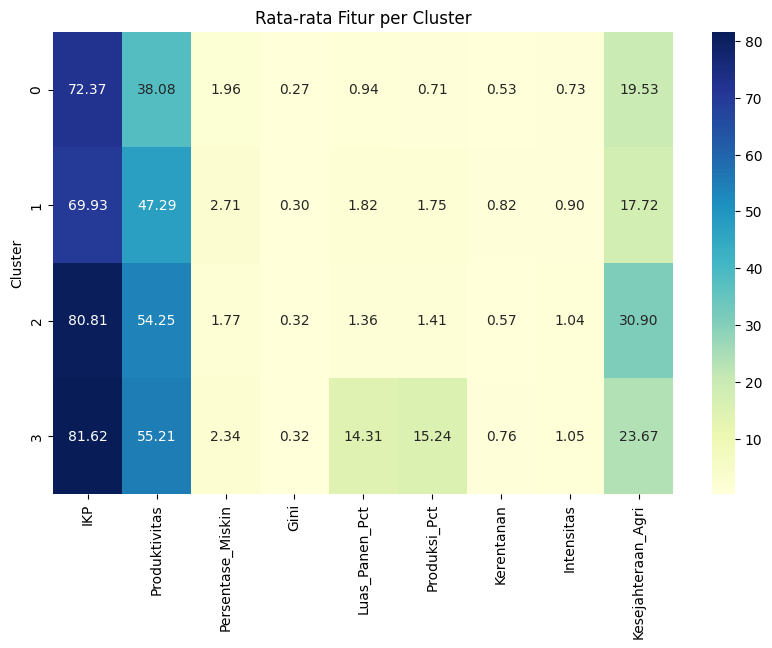

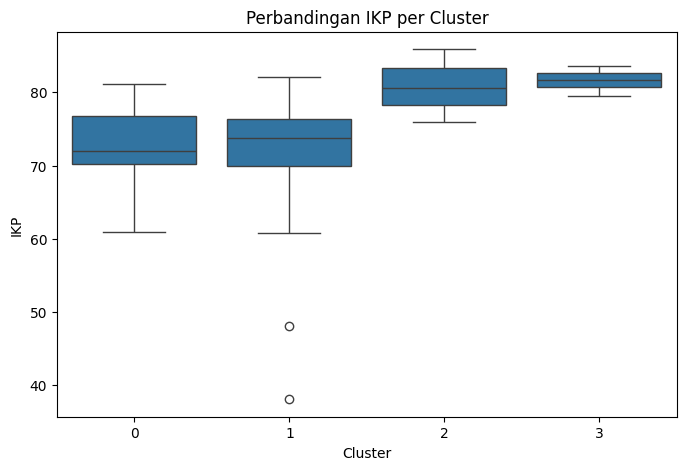

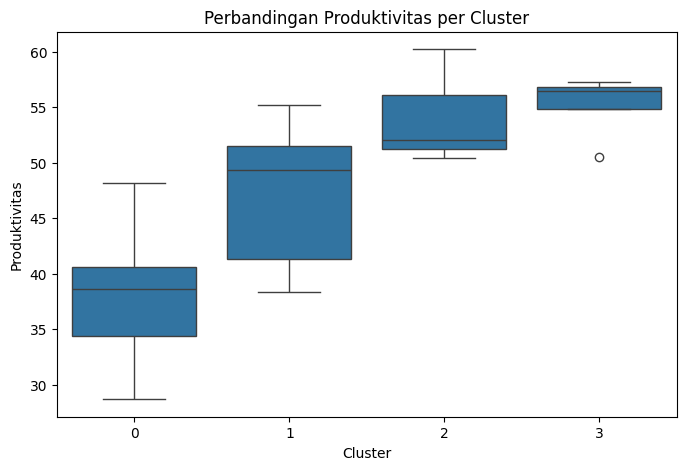

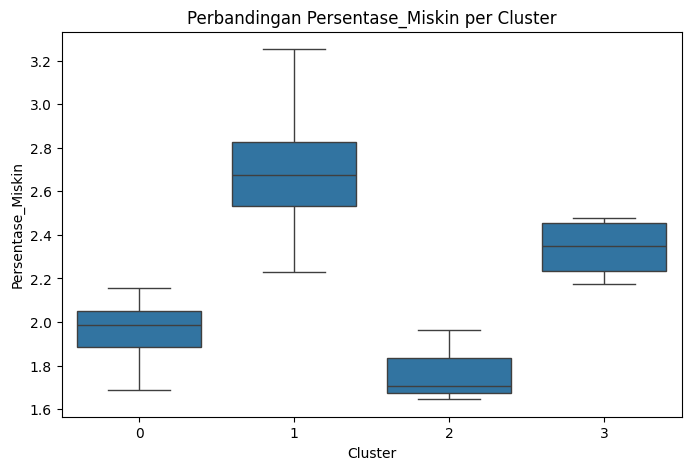

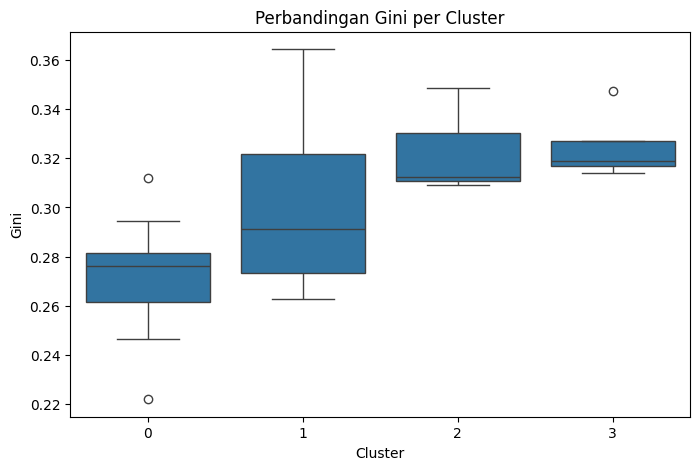

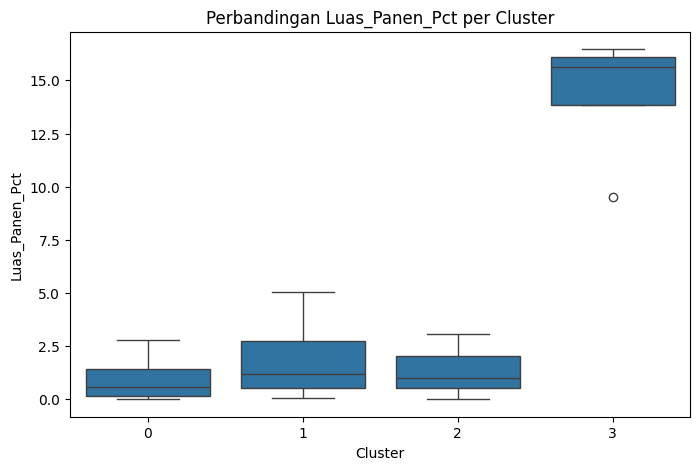

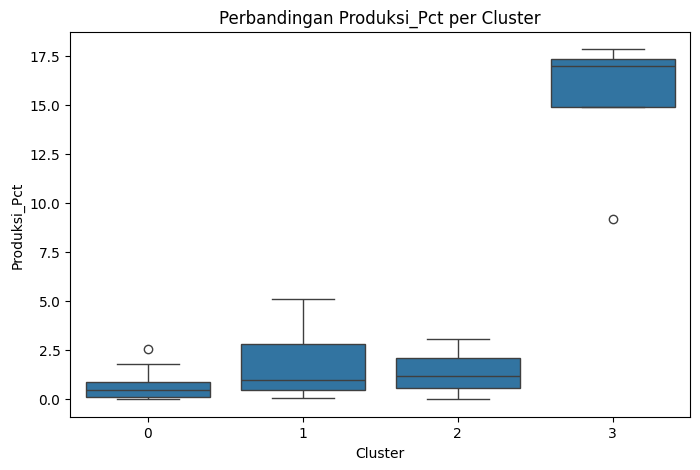

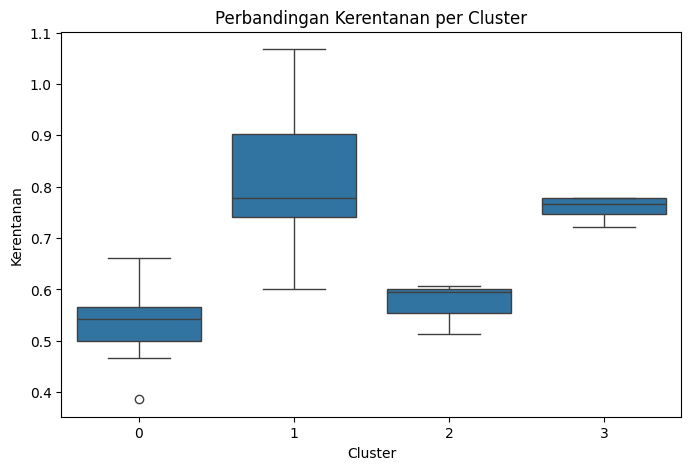

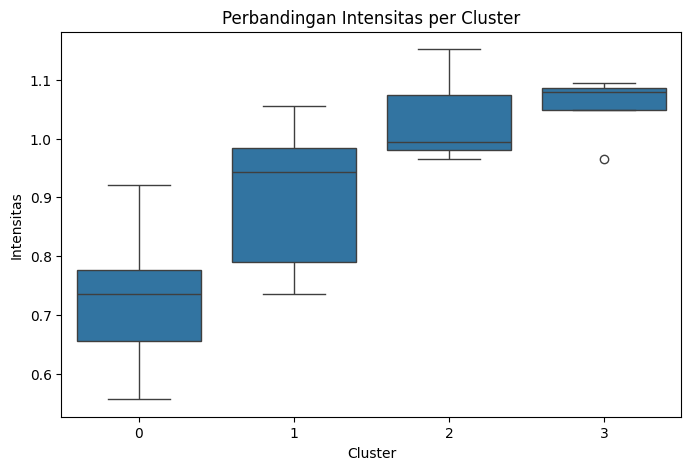

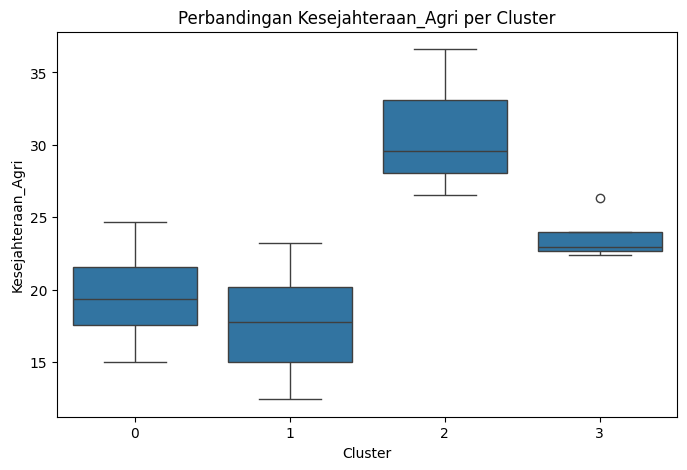

In [ ]:
cluster_summary = df.groupby('Cluster')[num_cols].mean()
print(cluster_summary)

plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Rata-rata Fitur per Cluster")
plt.show()

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Cluster', y=col, data=df)
    plt.title(f'Perbandingan {col} per Cluster')
    plt.show()


In [ ]:
df_basic.head()

,PROVINSI,IKP,Luas_Panen,Produktivitas,Produksi,Persentase_Miskin,Gini,Cluster
0,ACEH,71.922,288432.356,55.238,1593121.920,14.410,0.3096,1
1,BALI,85.886,104164.120,60.240,628147.002,4.186,0.3666,2
2,BANTEN,75.920,318222.572,52.066,1656821.200,6.122,0.3624,2
3,BENGKULU,70.850,58129.216,48.410,281018.858,14.286,0.3300,1
4,DI YOGYAKARTA,82.060,106330.258,49.398,525714.406,11.572,0.4396,1


In [ ]:
num_cols_basic = ['IKP', 'Luas_Panen', 'Produktivitas', 'Produksi', 'Persentase_Miskin', 'Gini']
if 'TAHUN' in num_cols_basic:
    num_cols_basic.remove('TAHUN')

print("Numerical columns identified:")
print(num_cols_basic)
for c in sorted(df_basic['Cluster'].unique()):
    print(f"\nCluster {c}:")
    cluster_provinsi = df_basic[df_basic['Cluster']==c]['PROVINSI'].unique()
    print("Provinsi di cluster ini:", list(cluster_provinsi))
    cluster_features = df_basic[df_basic['Cluster']==c][num_cols_basic].mean()
    print("Karakteristik cluster (rata-rata fitur):")
    for feature, value in cluster_features.items():
        print(f"  {feature}: {value:.2f}")


Numerical columns identified:
['IKP', 'Luas_Panen', 'Produktivitas', 'Produksi', 'Persentase_Miskin', 'Gini']

Cluster 0:
Provinsi di cluster ini: ['JAMBI', 'KALIMANTAN BARAT', 'KALIMANTAN SELATAN', 'KALIMANTAN TENGAH', 'KALIMANTAN TIMUR', 'KALIMANTAN UTARA', 'KEPULAUAN BANGKA BELITUNG', 'KEPULAUAN RIAU', 'MALUKU UTARA', 'RIAU', 'SULAWESI UTARA', 'SUMATERA BARAT']
Karakteristik cluster (rata-rata fitur):
  IKP: 72.37
  Luas_Panen: 97244.41
  Produktivitas: 38.08
  Produksi: 384900.90
  Persentase_Miskin: 6.14
  Gini: 0.31

Cluster 1:
Provinsi di cluster ini: ['ACEH', 'BENGKULU', 'DI YOGYAKARTA', 'GORONTALO', 'LAMPUNG', 'MALUKU', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR', 'PAPUA', 'PAPUA BARAT', 'SULAWESI BARAT', 'SULAWESI TENGAH', 'SULAWESI TENGGARA', 'SUMATERA SELATAN', 'SUMATERA UTARA']
Karakteristik cluster (rata-rata fitur):
  IKP: 69.93
  Luas_Panen: 188593.48
  Produktivitas: 47.29
  Produksi: 948219.33
  Persentase_Miskin: 14.56
  Gini: 0.35

Cluster 2:
Provinsi di cluster in

In [ ]:
# Create a new DataFrame with 'PROVINSI' and 'Cluster' columns
df_cluster_provinsi = df[['PROVINSI', 'Cluster']].copy()

# Save the new DataFrame to a CSV file
df_cluster_provinsi.to_csv('provinsi_cluster.csv', index=False)

print("DataFrame with 'PROVINSI' and 'Cluster' saved to 'provinsi_cluster.csv'")

DataFrame with 'PROVINSI' and 'Cluster' saved to 'provinsi_cluster.csv'


In [ ]:
dasdas

NameError: name 'dasdas' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load data
df = pd.read_csv('/content/DATASET NUMERIK INTERGALACTIC - Sheet1.csv')

# Rename kolom
df = df.rename(columns={
    'Luas Panen Tanaman Padi (ha) (Ha)': 'Luas_Panen',
    'Produktivitas Tanaman Padi (ku/ha) (Ku/ha)': 'Produktivitas',
    'Rekap Produksi Padi (ton) (Ton)': 'Produksi',
    'Persentase Penduduk Miskin - Maret': 'Persentase_Miskin',
    'Gini Ratio': 'Gini'
})

num_cols = ['IKP', 'Luas_Panen', 'Produktivitas', 'Produksi', 'Persentase_Miskin', 'Gini']

# Ubah ',' menjadi '.' dan convert ke float
for col in num_cols:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Feature engineering: efisiensi produksi
df['Efisiensi'] = df['Produksi'] / df['Luas_Panen']
num_cols.append('Efisiensi')

# Log transform untuk skewed features
for col in ['Luas_Panen', 'Produksi', 'Efisiensi']:
    df[col] = np.log1p(df[col])

# Handle missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Scaling
scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# PCA
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled[num_cols]), columns=['PC1','PC2'])

# Optimasi GMM
best_score = -1
best_gmm = None
best_n = 0
best_cov = ''

for cov_type in ['full','tied','diag','spherical']:
    for n_clusters in range(2,6):
        gmm = GaussianMixture(n_components=n_clusters, covariance_type=cov_type, random_state=42, max_iter=500, init_params='kmeans')
        labels = gmm.fit_predict(df_pca)
        score = silhouette_score(df_pca, labels)
        if score > best_score:
            best_score = score
            best_gmm = gmm
            best_n = n_clusters
            best_cov = cov_type

print(f"Best GMM: n_clusters={best_n}, covariance_type={best_cov}, silhouette_score={best_score:.4f}")

# Fit best GMM
cluster_labels = best_gmm.predict(df_pca)
df_pca['Cluster'] = cluster_labels
df['Cluster'] = cluster_labels

# Visualisasi 2D
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=df_pca, s=100)
plt.title("GMM Clustering Optimized (2D PCA)")
plt.show()

# Heatmap & summary
cluster_summary = df.groupby('Cluster')[num_cols].mean()
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Rata-rata Fitur per Cluster")
plt.show()

# Daftar provinsi unik per cluster
for c in sorted(df['Cluster'].unique()):
    print(f"\nCluster {c}:")
    cluster_provinsi = df[df['Cluster']==c]['PROVINSI'].unique()
    print("Provinsi di cluster ini:", list(cluster_provinsi))
    cluster_features = df[df['Cluster']==c][num_cols].mean()
    print("Karakteristik cluster (rata-rata fitur):")
    for feature, value in cluster_features.items():
        print(f"  {feature}: {value:.2f}")
